In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator, FuncFormatter
import math

In [2]:
df = pd.read_csv("Coffe_sales_with_menu_price.csv")

In [3]:
df.head()

,hour_of_day,cash_type,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,money
0,10,card,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000,5.25
1,12,card,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000,3.45
2,12,card,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000,3.45
3,13,card,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000,4.45
4,13,card,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000,5.25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   coffee_name  3547 non-null   object 
 3   Time_of_Day  3547 non-null   object 
 4   Weekday      3547 non-null   object 
 5   Month_name   3547 non-null   object 
 6   Weekdaysort  3547 non-null   int64  
 7   Monthsort    3547 non-null   int64  
 8   Date         3547 non-null   object 
 9   Time         3547 non-null   object 
 10  money        3547 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [5]:
# convert to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")

/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_70053/3093750455.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Time"] = pd.to_datetime(df["Time"], errors="coerce")


In [6]:
df

,hour_of_day,cash_type,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,money
0,10,card,Latte,Morning,Fri,Mar,5,3,2024-03-01,2025-10-27 10:15:50.520,5.25
1,12,card,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-27 12:19:22.539,3.45
2,12,card,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-27 12:20:18.089,3.45
3,13,card,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-27 13:46:33.006,4.45
4,13,card,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-27 13:48:14.626,5.25
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,2025-10-27 10:34:54.894,5.25
3543,14,card,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,2025-10-27 14:43:37.362,3.45
3544,14,card,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,2025-10-27 14:44:16.864,3.45
3545,15,card,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,2025-10-27 15:47:28.723,4.45


In [7]:
df[df.duplicated()]

,hour_of_day,cash_type,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,money


In [8]:
df.isnull().any()

hour_of_day    False
cash_type      False
coffee_name    False
Time_of_Day    False
Weekday        False
Month_name     False
Weekdaysort    False
Monthsort      False
Date           False
Time           False
money          False
dtype: bool

In [9]:
df["money"] = pd.to_numeric(df["money"], errors="coerce")

In [10]:
weekday_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
month_order = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]

df["Weekday"] = pd.Categorical(df["Weekday"], categories=weekday_order, ordered=True)
df["Month_name"] = pd.Categorical(
    df["Month_name"], categories=month_order, ordered=True
)

In [11]:
df.head()

,hour_of_day,cash_type,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,money
0,10,card,Latte,Morning,Fri,Mar,5,3,2024-03-01,2025-10-27 10:15:50.520,5.25
1,12,card,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-27 12:19:22.539,3.45
2,12,card,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-27 12:20:18.089,3.45
3,13,card,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-27 13:46:33.006,4.45
4,13,card,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-27 13:48:14.626,5.25


# Question 1 
What times of day and days of the week generate the highest sales volume, and how can staffing or store hours be optimized to match customer demand? 

Purpose: Helps identify peak operational periods to guide shift scheduling and labor cost efficiency.

In [12]:
# general aggregations
sales_by_hour = (
    df.groupby("hour_of_day", as_index=False)["money"].sum().sort_values("hour_of_day")
)
count_by_hour = (
    df.groupby("hour_of_day", as_index=False)
    .size()
    .rename(columns={"size": "transactions"})
)
sales_by_timeofday = (
    df.groupby("Time_of_Day", as_index=False)["money"]
    .sum()
    .sort_values("money", ascending=False)
)
sales_by_weekday = (
    df.groupby(["Weekday", "Weekdaysort"], as_index=False)["money"]
    .sum()
    .sort_values("Weekdaysort")
)
sales_by_coffee = (
    df.groupby("coffee_name", as_index=False)["money"]
    .sum()
    .sort_values("money", ascending=False)
)

/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_70053/1069618463.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Weekday", "Weekdaysort"], as_index=False)["money"]


In [13]:
pivot_df = df.pivot_table(
    index="hour_of_day", columns="Weekday", values="money", aggfunc="sum", fill_value=0
)

/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_70053/1772292445.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df.pivot_table(


In [14]:
pivot_df

Weekday,Mon,Tue,Wed,Thu,Fri,Sat,Sun
hour_of_day,,,,,,,
6,9.70,0.00,0.00,0.00,13.35,0.00,0.00
7,105.45,69.50,84.45,63.45,82.85,9.70,8.90
8,188.25,220.85,131.65,102.20,216.55,107.10,88.70
9,165.80,175.75,117.25,146.70,225.15,149.15,95.05
10,232.90,213.95,211.10,217.55,189.35,183.65,228.05
11,173.25,247.50,203.50,125.65,124.10,242.35,130.50
12,112.15,134.75,149.05,129.25,163.60,207.30,188.75
13,124.95,99.45,195.35,138.75,163.70,147.45,148.20
14,190.90,147.60,68.45,150.85,148.35,169.45,142.85


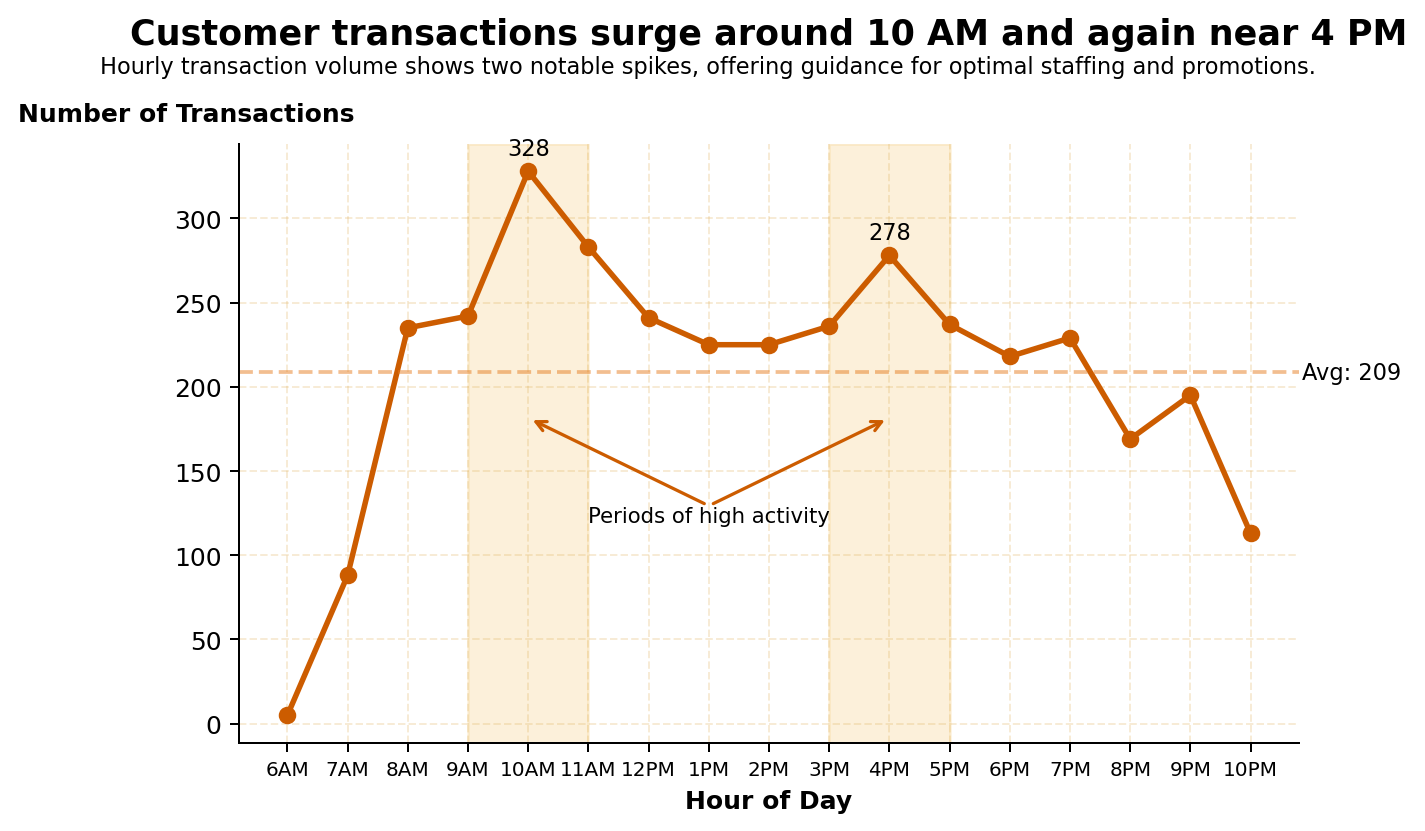

In [15]:
tx_hour = count_by_hour.sort_values("hour_of_day")

fig, ax_tx = plt.subplots(figsize=(8, 5), dpi=180)

main_color = "#cc5c00"
light_color = "#f5c76e"
highlight_color = "#e67e22"

ax_tx.plot(
    tx_hour["hour_of_day"],
    tx_hour["transactions"],
    marker="o",
    linewidth=2.2,
    color=main_color,
)
ax_tx.grid(True, linestyle="--", alpha=0.25, color="#e0b35c")

spacing = tx_hour["transactions"].max() * 0.02
peak_hours = [10, 16]
for x, y in zip(tx_hour["hour_of_day"], tx_hour["transactions"]):
    if x in peak_hours:
        ax_tx.text(
            x,
            y + spacing,
            f"{y:,.0f}",
            ha="center",
            va="bottom",
            fontsize=9,
            fontweight="medium",
            color="black",
        )

plt.suptitle(
    "Hourly transaction volume shows two notable spikes, offering guidance for optimal staffing and promotions.",
    fontsize=9,
    fontweight="medium",
    y=0.872,
    x=0.5,
    ha="center",
    color="black",
)

plt.title(
    "Customer transactions surge around 10 AM and again near 4 PM",
    fontsize=14,
    fontweight="bold",
    pad=40,
    loc="center",
    color="black",
)

plt.xlabel("Hour of Day", fontsize=10, fontweight="bold", color="black")
plt.ylabel("", fontsize=10, fontweight="bold")

ax_tx.text(
    -0.05,
    1.03,
    "Number of Transactions",
    transform=ax_tx.transAxes,
    ha="center",
    va="bottom",
    fontweight="bold",
    fontsize=10,
    color="black",
)

ax_tx.set_xticks(range(6, 23))
ax_tx.set_xticklabels(
    [f"{h%12 or 12}{'AM' if h < 12 else 'PM'}" for h in range(6, 23)],
    fontsize=8,
    fontweight="medium",
    color="black",
    family="sans-serif",
)

# get the avg line
avg_tx = tx_hour["transactions"].mean()
ax_tx.axhline(avg_tx, color=highlight_color, linestyle="--", alpha=0.5)
ax_tx.text(
    x=tx_hour["hour_of_day"].max() + 0.85,
    y=avg_tx,
    s=f"Avg: {avg_tx:,.0f}",
    va="center",
    ha="left",
    fontsize=9,
    color="black",
    fontweight="medium",
)

# highlight windows
ax_tx.axvspan(9, 11, color=light_color, alpha=0.25)
ax_tx.axvspan(15, 17, color=light_color, alpha=0.25)

label_y = avg_tx * 0.62
arrow_y = avg_tx * 0.87

ax_tx.text(
    13,
    label_y,
    "Periods of high activity",
    ha="center",
    va="top",
    fontsize=8.5,
    fontweight="medium",
    color="black",
)

ax_tx.annotate(
    "",
    xy=(10, arrow_y),
    xytext=(13, label_y),
    arrowprops=dict(arrowstyle="->", lw=1.3, color=main_color),
)
ax_tx.annotate(
    "",
    xy=(16, arrow_y),
    xytext=(13, label_y),
    arrowprops=dict(arrowstyle="->", lw=1.3, color=main_color),
)

sns.despine()
plt.tight_layout()
plt.show()

We need to post processes this for better labeling for which we move our plot above to a word document and then work on the labels 

The is our plot post processing

![post_process_3](post_process_3.png)

In [16]:
weekday_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
pivot_df = pivot_df[weekday_order]

left_data = pivot_df.copy()


def get_time_of_day(hour):
    if 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour <= 22:
        return "Evening"
    else:
        return "Other"


df_long = pivot_df.reset_index().melt(
    id_vars="hour_of_day", var_name="Weekday", value_name="Revenue"
)
df_long["TimeOfDay"] = df_long["hour_of_day"].apply(get_time_of_day)
agg = df_long.groupby(["Weekday", "TimeOfDay"])["Revenue"].sum().reset_index()
time_order = ["Morning", "Afternoon", "Evening"]
right_data = (
    agg.pivot(index="Weekday", columns="TimeOfDay", values="Revenue")
    .reindex(index=weekday_order, columns=time_order)
    .fillna(0)
)

In [17]:
# prepare heatmap
td_map = {"Night": "Evening"}
df_for_heatmap = df.assign(Time_of_Day_plot=df["Time_of_Day"].replace(td_map))

right_data = (
    df_for_heatmap.pivot_table(
        index="Weekday",
        columns="Time_of_Day_plot",
        values="money",
        aggfunc="sum",
        fill_value=0,
    )
    .reindex(index=weekday_order)
    .reindex(columns=time_order, fill_value=0)
    .astype(float)
)

/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_70053/1853107675.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_for_heatmap.pivot_table(


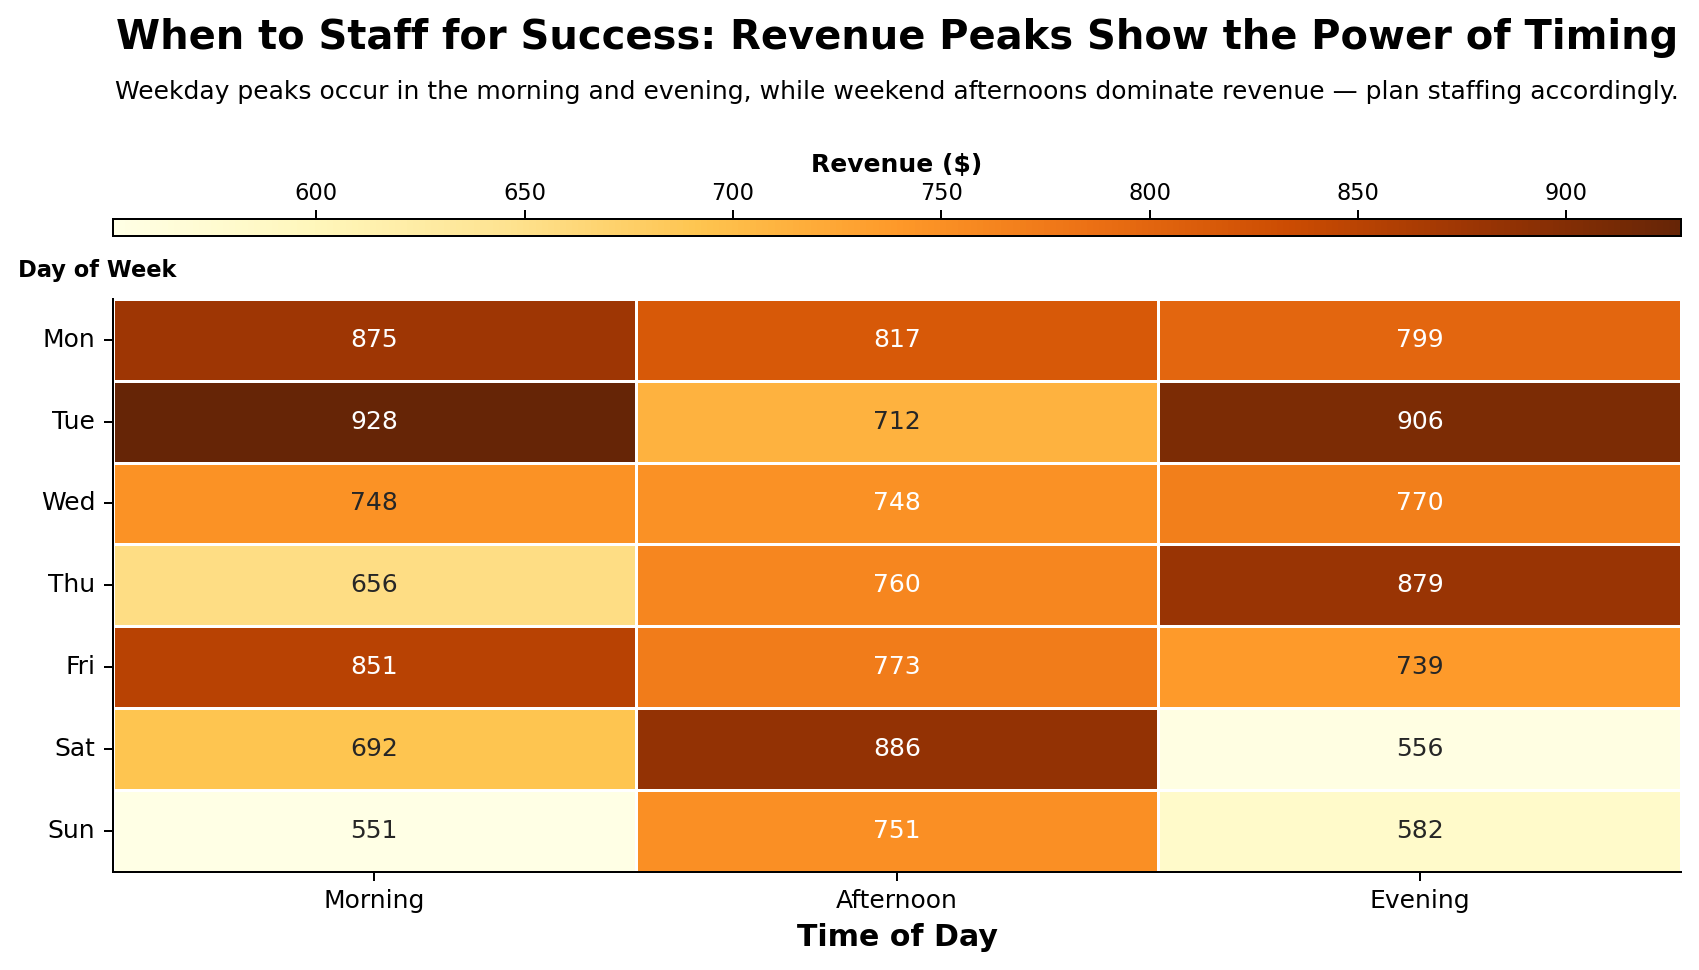

In [18]:
weekday_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
time_order = ["Morning", "Afternoon", "Evening"]

fig, ax = plt.subplots(figsize=(10, 6), dpi=180)

heatmap = sns.heatmap(
    right_data,
    ax=ax,
    cmap="YlOrBr",
    annot=True,
    fmt=".0f",
    linewidths=0.5,
    linecolor="white",
    cbar=False,
)

# horizontal colorbar axis just above the heatmap
from mpl_toolkits.axes_grid1 import make_axes_locatable

divider = make_axes_locatable(ax)
cax = divider.append_axes("top", size="3%", pad=0.35)
norm = plt.Normalize(vmin=right_data.values.min(), vmax=right_data.values.max())
sm = plt.cm.ScalarMappable(cmap="YlOrBr", norm=norm)
cbar = fig.colorbar(sm, cax=cax, orientation="horizontal")
cbar.set_label("Revenue ($)", fontsize=10, fontweight="bold", labelpad=4)
cbar.ax.tick_params(labelsize=9, pad=2)
cbar.ax.xaxis.set_ticks_position("top")
cbar.ax.xaxis.set_label_position("top")

ax.set_title(
    "When to Staff for Success: Revenue Peaks Show the Power of Timing",
    fontsize=16,
    fontweight="bold",
    pad=100,
)
ax.text(
    0.5,
    1.35,
    "Weekday peaks occur in the morning and evening, while weekend afternoons dominate revenue — plan staffing accordingly.",
    transform=ax.transAxes,
    ha="center",
    fontsize=10,
)

ax.set_xlabel("Time of Day", fontsize=12, fontweight="bold")
ax.set_ylabel("", fontsize=10, fontweight="bold")
ax.text(
    -0.01,
    1.03,
    "Day of Week",
    transform=ax.transAxes,
    ha="center",
    va="bottom",
    fontweight="bold",
    fontsize=9,
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

sns.despine()
plt.tight_layout(rect=[0, 0.05, 1, 0.96])
plt.show()

In [19]:
hour_sales = sales_by_hour.set_index("hour_of_day")["money"]
normalized = hour_sales / hour_sales.max() if hour_sales.max() > 0 else hour_sales * 0
recommended_staff = (normalized * 5).apply(math.ceil) + 1

recommended_df = recommended_staff.reset_index().rename(
    columns={"money": "recommended_staff"}
)

rec_hours = (
    pd.DataFrame({"hour_of_day": range(6, 23)})
    .merge(recommended_df, on="hour_of_day", how="left")
    .fillna(1)
)
rec_hours["recommended_staff"] = rec_hours["recommended_staff"].astype(int)

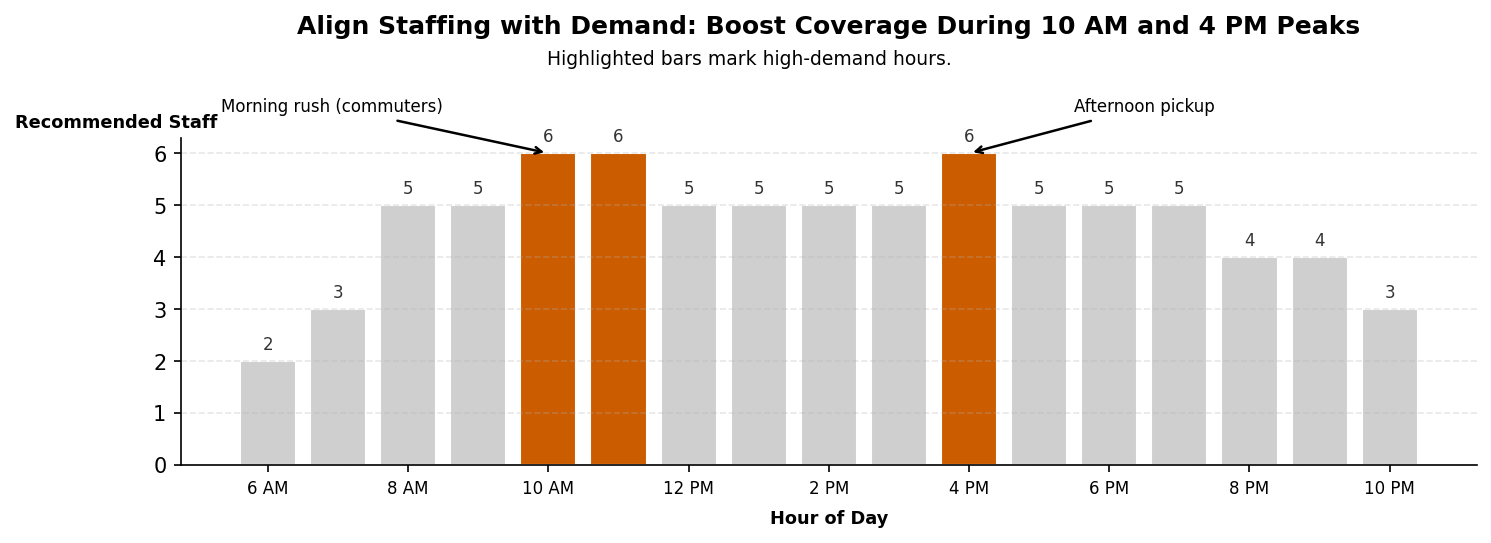

In [20]:
plt.figure(figsize=(10, 4), dpi=150)

non_peak_color = "#cfcfcf"
peak_color = "#cc5c00"

bars = plt.bar(
    rec_hours["hour_of_day"],
    rec_hours["recommended_staff"],
    color=non_peak_color,
    edgecolor="white",
)

for idx, val in enumerate(rec_hours["recommended_staff"]):
    plt.text(
        rec_hours["hour_of_day"].iloc[idx],
        val + 0.15,
        str(val),
        ha="center",
        va="bottom",
        fontsize=8,
        color="#333",
    )

# highlight peak bars
peak_hours = [10, 11, 16]
plt.bar(
    rec_hours.loc[rec_hours["hour_of_day"].isin(peak_hours), "hour_of_day"],
    rec_hours.loc[rec_hours["hour_of_day"].isin(peak_hours), "recommended_staff"],
    color=peak_color,
    edgecolor="white",
)

plt.title(
    "Align Staffing with Demand: Boost Coverage During 10 AM and 4 PM Peaks",
    fontsize=12,
    fontweight="bold",
    pad=50,
)
plt.suptitle(
    "Highlighted bars mark high-demand hours.",
    fontsize=9,
    y=0.835,
)

plt.xlabel("Hour of Day", fontsize=8.5, fontweight="bold", labelpad=6)
plt.ylabel("")
plt.text(
    -0.05,
    1.02,
    "Recommended Staff",
    transform=plt.gca().transAxes,
    ha="center",
    va="bottom",
    fontweight="bold",
    fontsize=8.5,
)

ax = plt.gca()
ax.set_xticks(range(6, 23))
ax.set_xticklabels(
    [f"{h%12 or 12} {'AM' if h < 12 else 'PM'}" for h in range(6, 23)],
    rotation=0,
    fontsize=8,
    fontweight="medium",
    family="sans-serif",
)

plt.annotate(
    "Morning rush (commuters)",
    xy=(10, 6),
    xytext=(8.5, 6.8),
    arrowprops=dict(arrowstyle="->", color="black", lw=1.2),
    fontsize=8,
    color="black",
    ha="right",
)

plt.annotate(
    "Afternoon pickup",
    xy=(16, 6),
    xytext=(17.5, 6.8),
    arrowprops=dict(arrowstyle="->", color="black", lw=1.2),
    fontsize=8,
    color="black",
    ha="left",
)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(axis="y", linestyle="--", alpha=0.3)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

In [21]:
rec_open_hours = rec_hours[rec_hours["recommended_staff"] > 1][
    ["hour_of_day", "recommended_staff"]
]
print("Recommended Staff by Hour (hours with >1 staff):")
print(rec_open_hours)

Recommended Staff by Hour (hours with >1 staff):
    hour_of_day  recommended_staff
0             6                  2
1             7                  3
2             8                  5
3             9                  5
4            10                  6
5            11                  6
6            12                  5
7            13                  5
8            14                  5
9            15                  5
10           16                  6
11           17                  5
12           18                  5
13           19                  5
14           20                  4
15           21                  4
16           22                  3


# Question 2
Which types of coffee are most popular during different times of the day, and how should inventory and promotions adjust accordingly?
Purpose: Helps managers plan inventory and marketing by matching coffee types to customer habits (e.g., cappuccinos in the morning, iced drinks in the afternoon).

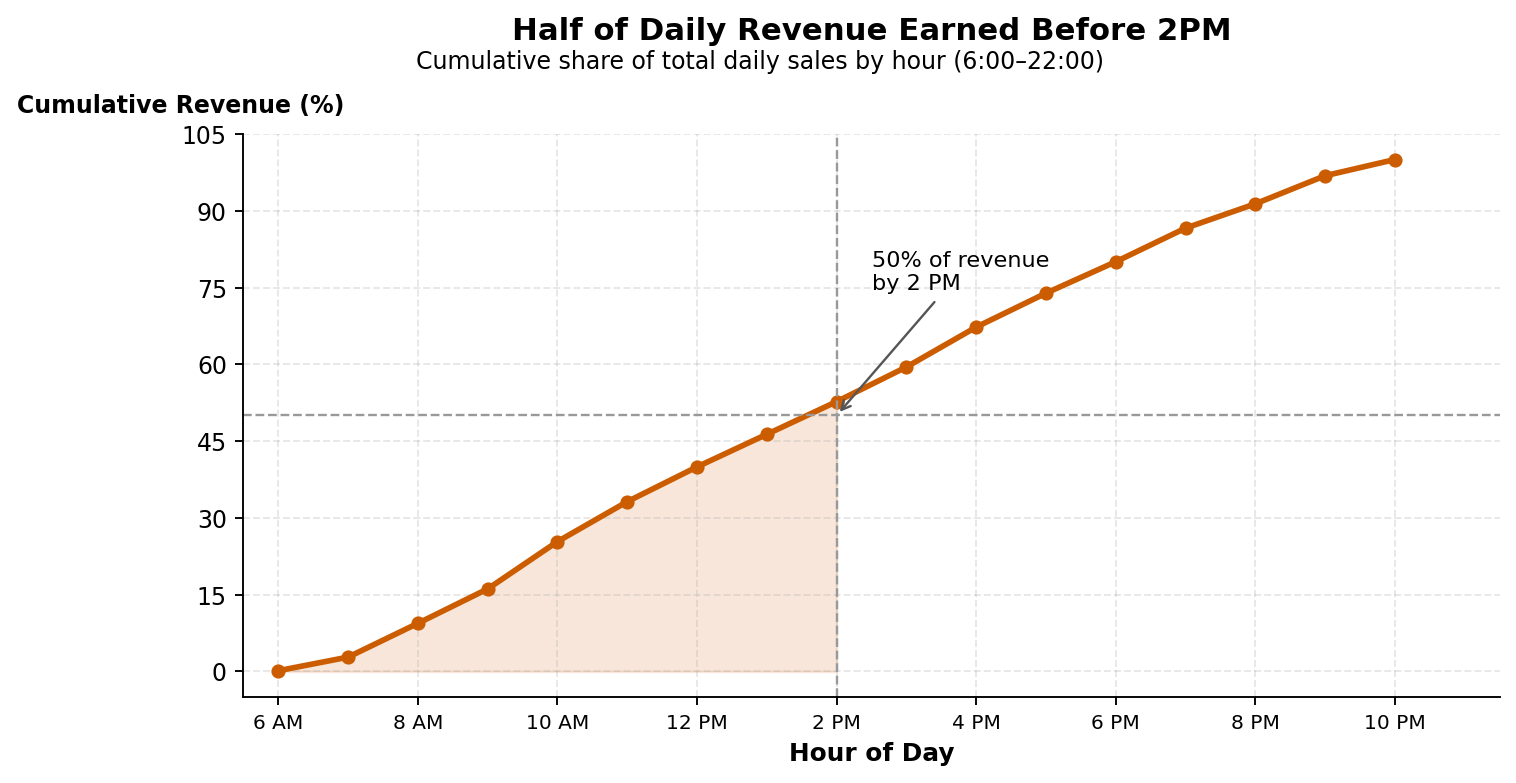

In [22]:
assert {"hour_of_day", "money"} <= set(df.columns), "Missing columns."

OPEN_HOUR = 6
CLOSE_HOUR = 23

h = (
    df.assign(hour_of_day=pd.to_numeric(df["hour_of_day"], errors="coerce"))
    .dropna(subset=["hour_of_day", "money"])
    .query("@OPEN_HOUR <= hour_of_day <= @CLOSE_HOUR")
    .groupby("hour_of_day", dropna=True)["money"]
    .sum()
    .sort_index()
)
if h.empty:
    print("No hourly data to plot within open hours.")
else:
    cum_pct = h.cumsum() / h.sum() * 100
    half_idx = (cum_pct >= 50).idxmax()

    plt.figure(figsize=(9, 5), dpi=170)
    ax = plt.gca()

    plt.plot(
        cum_pct.index,
        cum_pct.values,
        color="#cc5c00",
        lw=2.4,
        marker="o",
        markersize=5,
    )

    plt.fill_between(
        cum_pct.index,
        0,
        cum_pct.values,
        where=cum_pct.index <= half_idx,
        color="#cc5c00",
        alpha=0.15,
    )

    plt.axhline(50, ls="--", c="#999", lw=1)
    plt.axvline(half_idx, ls="--", c="#999", lw=1)

    hour_12 = half_idx % 12
    hour_12 = 12 if hour_12 == 0 else hour_12
    period = "AM" if half_idx < 12 else "PM"

    plt.annotate(
        f"50% of revenue\nby {hour_12} {period}",
        xy=(half_idx, 50),
        xytext=(half_idx + 0.5, 78),
        arrowprops=dict(arrowstyle="->", color="#555", lw=1),
        fontsize=9.5,
        ha="left",
        va="center",
    )

    plt.title(
        "Half of Daily Revenue Earned Before 2PM",
        fontsize=13,
        fontweight="bold",
        pad=40,
    )
    plt.suptitle(
        f"Cumulative share of total daily sales by hour ({OPEN_HOUR}:00–{CLOSE_HOUR-1}:00)",
        fontsize=10,
        y=0.873,
    )

    ax.set_xlabel("Hour of Day", fontsize=10.5, fontweight="bold")

    ax.text(
        -0.05,
        1.03,
        "Cumulative Revenue (%)",
        transform=ax.transAxes,
        ha="center",
        va="bottom",
        fontweight="bold",
        fontsize=10,
    )

    ax.set_xlim(OPEN_HOUR - 0.5, CLOSE_HOUR + 0.5)
    ax.set_xticks(range(OPEN_HOUR, CLOSE_HOUR + 1, 2))
    ax.set_xticklabels(
        [
            f"{h%12 or 12} {'AM' if h < 12 else 'PM'}"
            for h in range(OPEN_HOUR, CLOSE_HOUR + 1, 2)
        ],
        fontsize=8.5,
    )

    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.grid(axis="both", linestyle="--", alpha=0.3)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    plt.tight_layout()
    plt.show()

We need to post processes this for better labeling for which we move our plot above to a word document and then work on the labels 

The is our plot post processing

![post_process_2](post_process_2.png)

In [23]:
DAYPART_ORDER = ["Morning", "Afternoon", "Night"]
DAYPART_DESC = {"Morning": "Open–10am", "Afternoon": "10am–2pm", "Night": "6pm–Close"}
TOP_N = 8
CMAP = "Blues"
CURRENCY = FuncFormatter(lambda x, p: f"${x:,.0f}")

sales_by_coffee_ord = sales_by_coffee.sort_values("money", ascending=True).tail(TOP_N)
overall_top = sales_by_coffee_ord.iloc[-1]["coffee_name"]
overall_top_amt = sales_by_coffee_ord.iloc[-1]["money"]

coffee_heatmap = (
    df[df["coffee_name"].isin(sales_by_coffee_ord["coffee_name"])]
    .pivot_table(
        index="coffee_name",
        columns="Time_of_Day",
        values="money",
        aggfunc="sum",
        fill_value=0,
    )
    .reindex(index=sales_by_coffee_ord["coffee_name"].tolist())
    .reindex(columns=[d for d in DAYPART_ORDER if d in df["Time_of_Day"].unique()])
)

daypart_leads = coffee_heatmap.idxmax(axis=0)
lead_morn = daypart_leads.get("Morning", None)
lead_aft = daypart_leads.get("Afternoon", None)
lead_night = daypart_leads.get("Night", None)

/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_70053/3469133764.py:105: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 1, 0.97], pad=2.0)


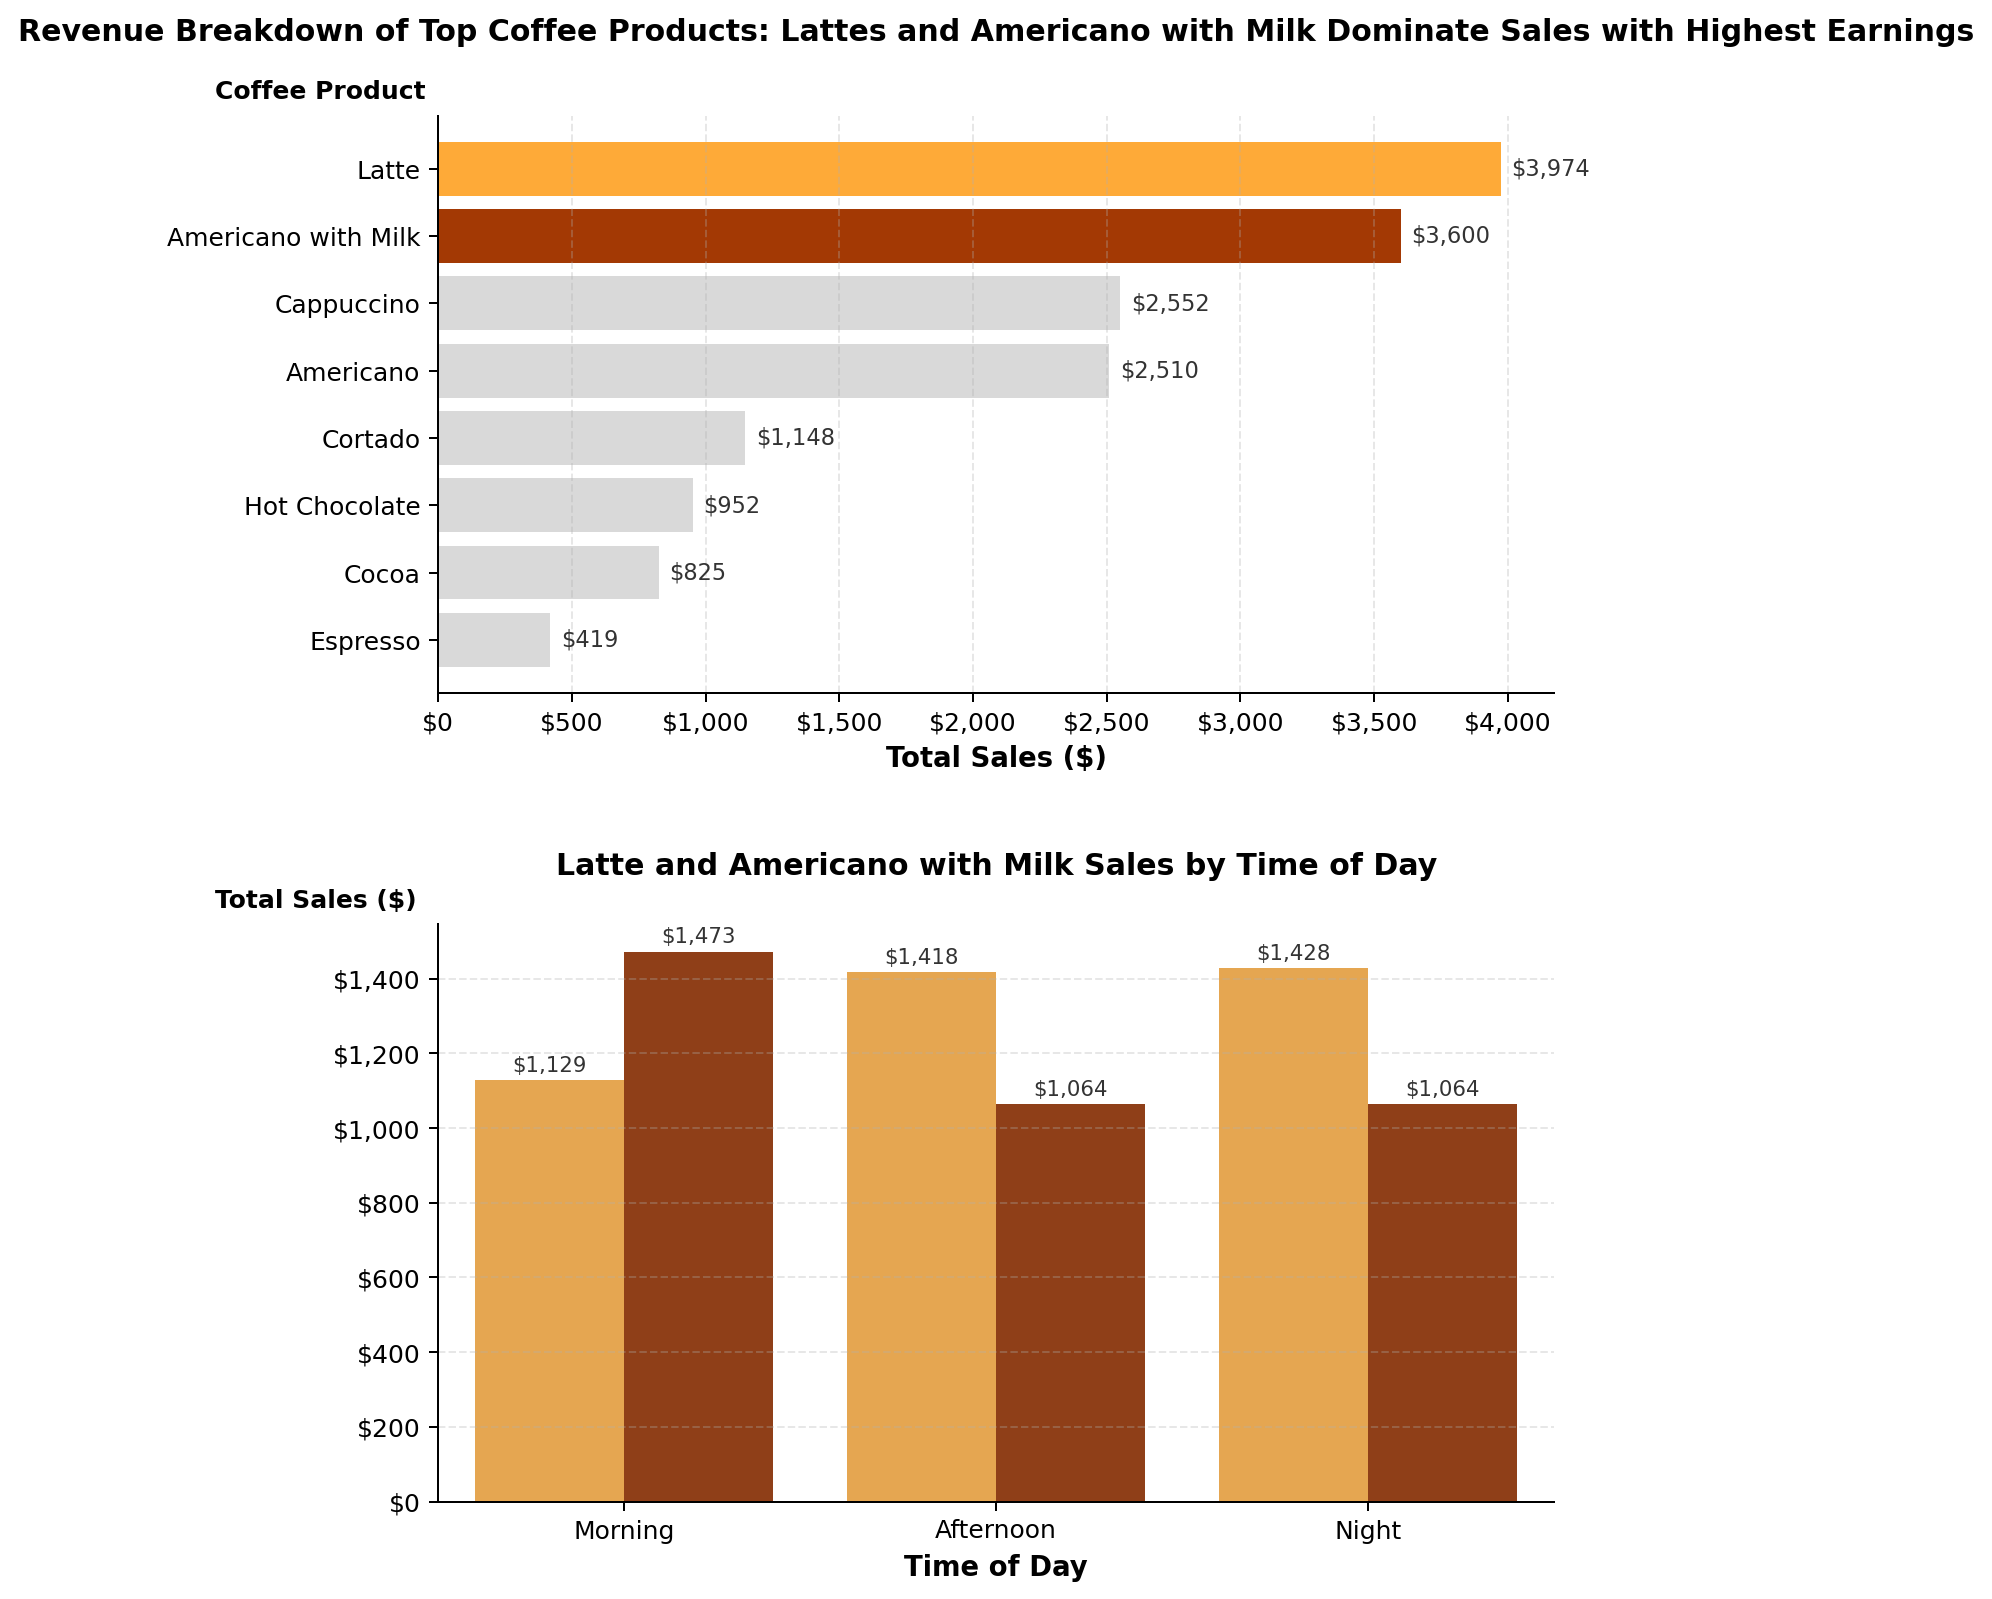

In [24]:
cmap = plt.cm.YlOrBr
latte_color = cmap(0.45)
americano_color = cmap(0.85)

fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(8, 10), dpi=180, gridspec_kw={"hspace": 0.4}
)

y = np.arange(len(sales_by_coffee_ord))
colors = []
for name in sales_by_coffee_ord["coffee_name"]:
    if name == "Latte":
        colors.append(latte_color)
    elif name == "Americano with Milk":
        colors.append(americano_color)
    else:
        colors.append("#D9D9D9")

bars = ax1.barh(y, sales_by_coffee_ord["money"].values, color=colors)

xmax = sales_by_coffee_ord["money"].max()
for yi, v in zip(y, sales_by_coffee_ord["money"].values):
    ax1.text(v + xmax * 0.01, yi, f"${v:,.0f}", va="center", fontsize=9, color="#333")

ax1.set_yticks(y)
ax1.set_yticklabels(sales_by_coffee_ord["coffee_name"])
ax1.set_xlabel("Total Sales ($)", fontsize=11, fontweight="bold")
ax1.set_ylabel("")
ax1.xaxis.set_major_formatter(CURRENCY)
ax1.grid(axis="x", linestyle="--", alpha=0.3)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

ax1.set_title(
    "Revenue Breakdown of Top Coffee Products: Lattes and Americano with Milk Dominate Sales with Highest Earnings",
    fontsize=12,
    fontweight="bold",
    pad=30,
)
ax1.text(
    -0.2,
    1.02,
    "Coffee Product",
    transform=ax1.transAxes,
    fontsize=10,
    ha="left",
    va="bottom",
    fontweight="bold",
)

focus_products = ["Latte", "Americano with Milk"]
focus_df = coffee_heatmap.loc[focus_products]

focus_long = focus_df.reset_index().melt(
    id_vars="coffee_name", var_name="Time of Day", value_name="Sales ($)"
)
focus_long.rename(columns={"coffee_name": "Coffee"}, inplace=True)

sns.barplot(
    data=focus_long,
    x="Time of Day",
    y="Sales ($)",
    hue="Coffee",
    ax=ax2,
    palette=[latte_color, americano_color],
)

for container in ax2.containers:
    ax2.bar_label(
        container,
        labels=[f"${h.get_height():,.0f}" for h in container],
        fmt="%d",
        label_type="edge",
        padding=2,
        fontsize=8.5,
        color="#333",
    )

ax2.set_title(
    "Latte and Americano with Milk Sales by Time of Day",
    fontsize=12,
    fontweight="bold",
    pad=20,
)
ax2.text(
    -0.2,
    1.02,
    "Total Sales ($)",
    transform=ax2.transAxes,
    fontsize=10,
    ha="left",
    va="bottom",
    fontweight="bold",
)

ax2.set_xlabel("Time of Day", fontsize=11, fontweight="bold")
ax2.set_ylabel("")
ax2.yaxis.set_major_formatter(CURRENCY)
ax2.grid(axis="y", linestyle="--", alpha=0.3)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

ax2.legend_.remove()

fig.tight_layout(rect=[0, 0, 1, 0.97], pad=2.0)
plt.show()

We need to post processes this for better labeling for which we move our facetted plot above to a word document and then work on the labels 

The is our plot post processing

![post_process](post_process.png)